# One Piece Anime Ratings

This notebook extracts episode ratings for One Piece from IMDb, then visualizes them in the style of a graphic made by [Hannes Benne](https://public.tableau.com/profile/hannes.benne#!/vizhome/SimpsonsEpisodeRating/EpisodeRating)

Inspired by [this](https://github.com/AyrtonB/IMDB-Show-Ratings/blob/master/Futurama.ipynb) chart about Futurama.

By simply changing the show id (found on [IMDb](https://www.imdb.com)), you can visualize ratings charts for other TV series as well!


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import ratings

In [3]:
showId = 'tt0388629' #IMDb show id 
df_ratings = ratings.show_id_2_ratings_df(showId)
df_ratings.head()

 [████████████████████████████████████████████████████████████] 21/21 [02:09<00:01, 6.13s/it]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,7.7,7.0,8.0,7.6,7.6,7.7,7.0,7.0,7.6,7.3,...,8.8,7.6,7.2,7.1,8.3,8.3,7.8,8.5,8.1,8.9
2,7.4,6.7,7.3,7.9,7.7,8.0,7.5,7.1,7.6,7.6,...,9.1,7.2,7.2,6.8,8.3,9.1,7.7,8.2,9.1,9.2
3,7.8,6.7,7.3,7.9,8.1,7.1,6.8,6.8,7.5,7.6,...,8.7,7.3,6.9,7.8,8.0,7.9,7.7,7.7,8.8,8.2
4,8.1,6.6,7.1,7.7,7.5,8.4,7.1,6.8,7.6,7.6,...,9.1,7.3,7.0,7.7,7.9,8.6,7.8,7.9,9.6,7.8
5,8.3,6.7,8.1,7.8,7.6,7.6,7.4,6.8,7.8,7.7,...,8.3,7.4,6.9,7.8,7.9,7.9,7.4,7.8,8.6,7.8


In [5]:
# Saving as a file
df_ratings.to_csv('OnePiece_Ratings.csv')

I noticed many errors in the IMDb database for the [One Piece episode list](https://www.imdb.com/title/tt0388629/episodes?year=2004). It took me an hour in figuring out how the episodes were jumbled and in putting them back in order. I did that part manually.   

In [4]:
df_ratings = pd.read_csv('OnePiece_RatingsFixed.csv')
df_ratings.index.name = 'Episode Count'
df_ratings.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Episode Count,,,,,,,,,,,,,,,,,,,,,
0,7.6,7.3,8.1,8.0,7.1,7.9,7.0,7.9,6.0,8.0,...,8.8,7.6,7.2,7.1,8.3,8.3,7.8,8.5,8.1,8.9
1,7.7,7.5,7.6,7.3,6.8,7.9,7.0,7.9,7.7,7.8,...,9.1,7.2,7.2,6.8,8.3,9.1,7.7,8.2,9.1,9.2
2,7.6,7.4,7.6,7.3,6.8,8.1,7.1,7.8,7.9,7.6,...,8.7,7.3,6.9,7.8,8.0,7.9,7.7,7.7,8.8,8.2
3,8.1,7.7,7.9,7.1,6.8,8.0,7.2,8.0,7.7,7.7,...,9.1,7.3,7.0,7.7,7.9,8.6,7.8,7.9,9.6,7.8
4,7.5,7.8,7.9,7.0,7.5,8.2,7.6,8.0,8.1,7.8,...,8.3,7.4,6.9,7.8,7.9,7.9,7.4,7.8,8.6,7.8


## Visualization

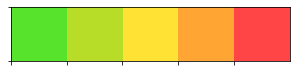

In [5]:
#colors = ['maroon','orangered', 'darkorange', 'gold', 'navajowhite']
colors = ['#57e32c', '#b7dd29', '#ffe234', '#ffa534', '#ff4545']
color_segment_starts = [0, 0.6, 0.7, 0.8, 0.9]

cm = ratings.create_cm(colors, color_segment_starts)

sns.palplot(sns.color_palette(colors))

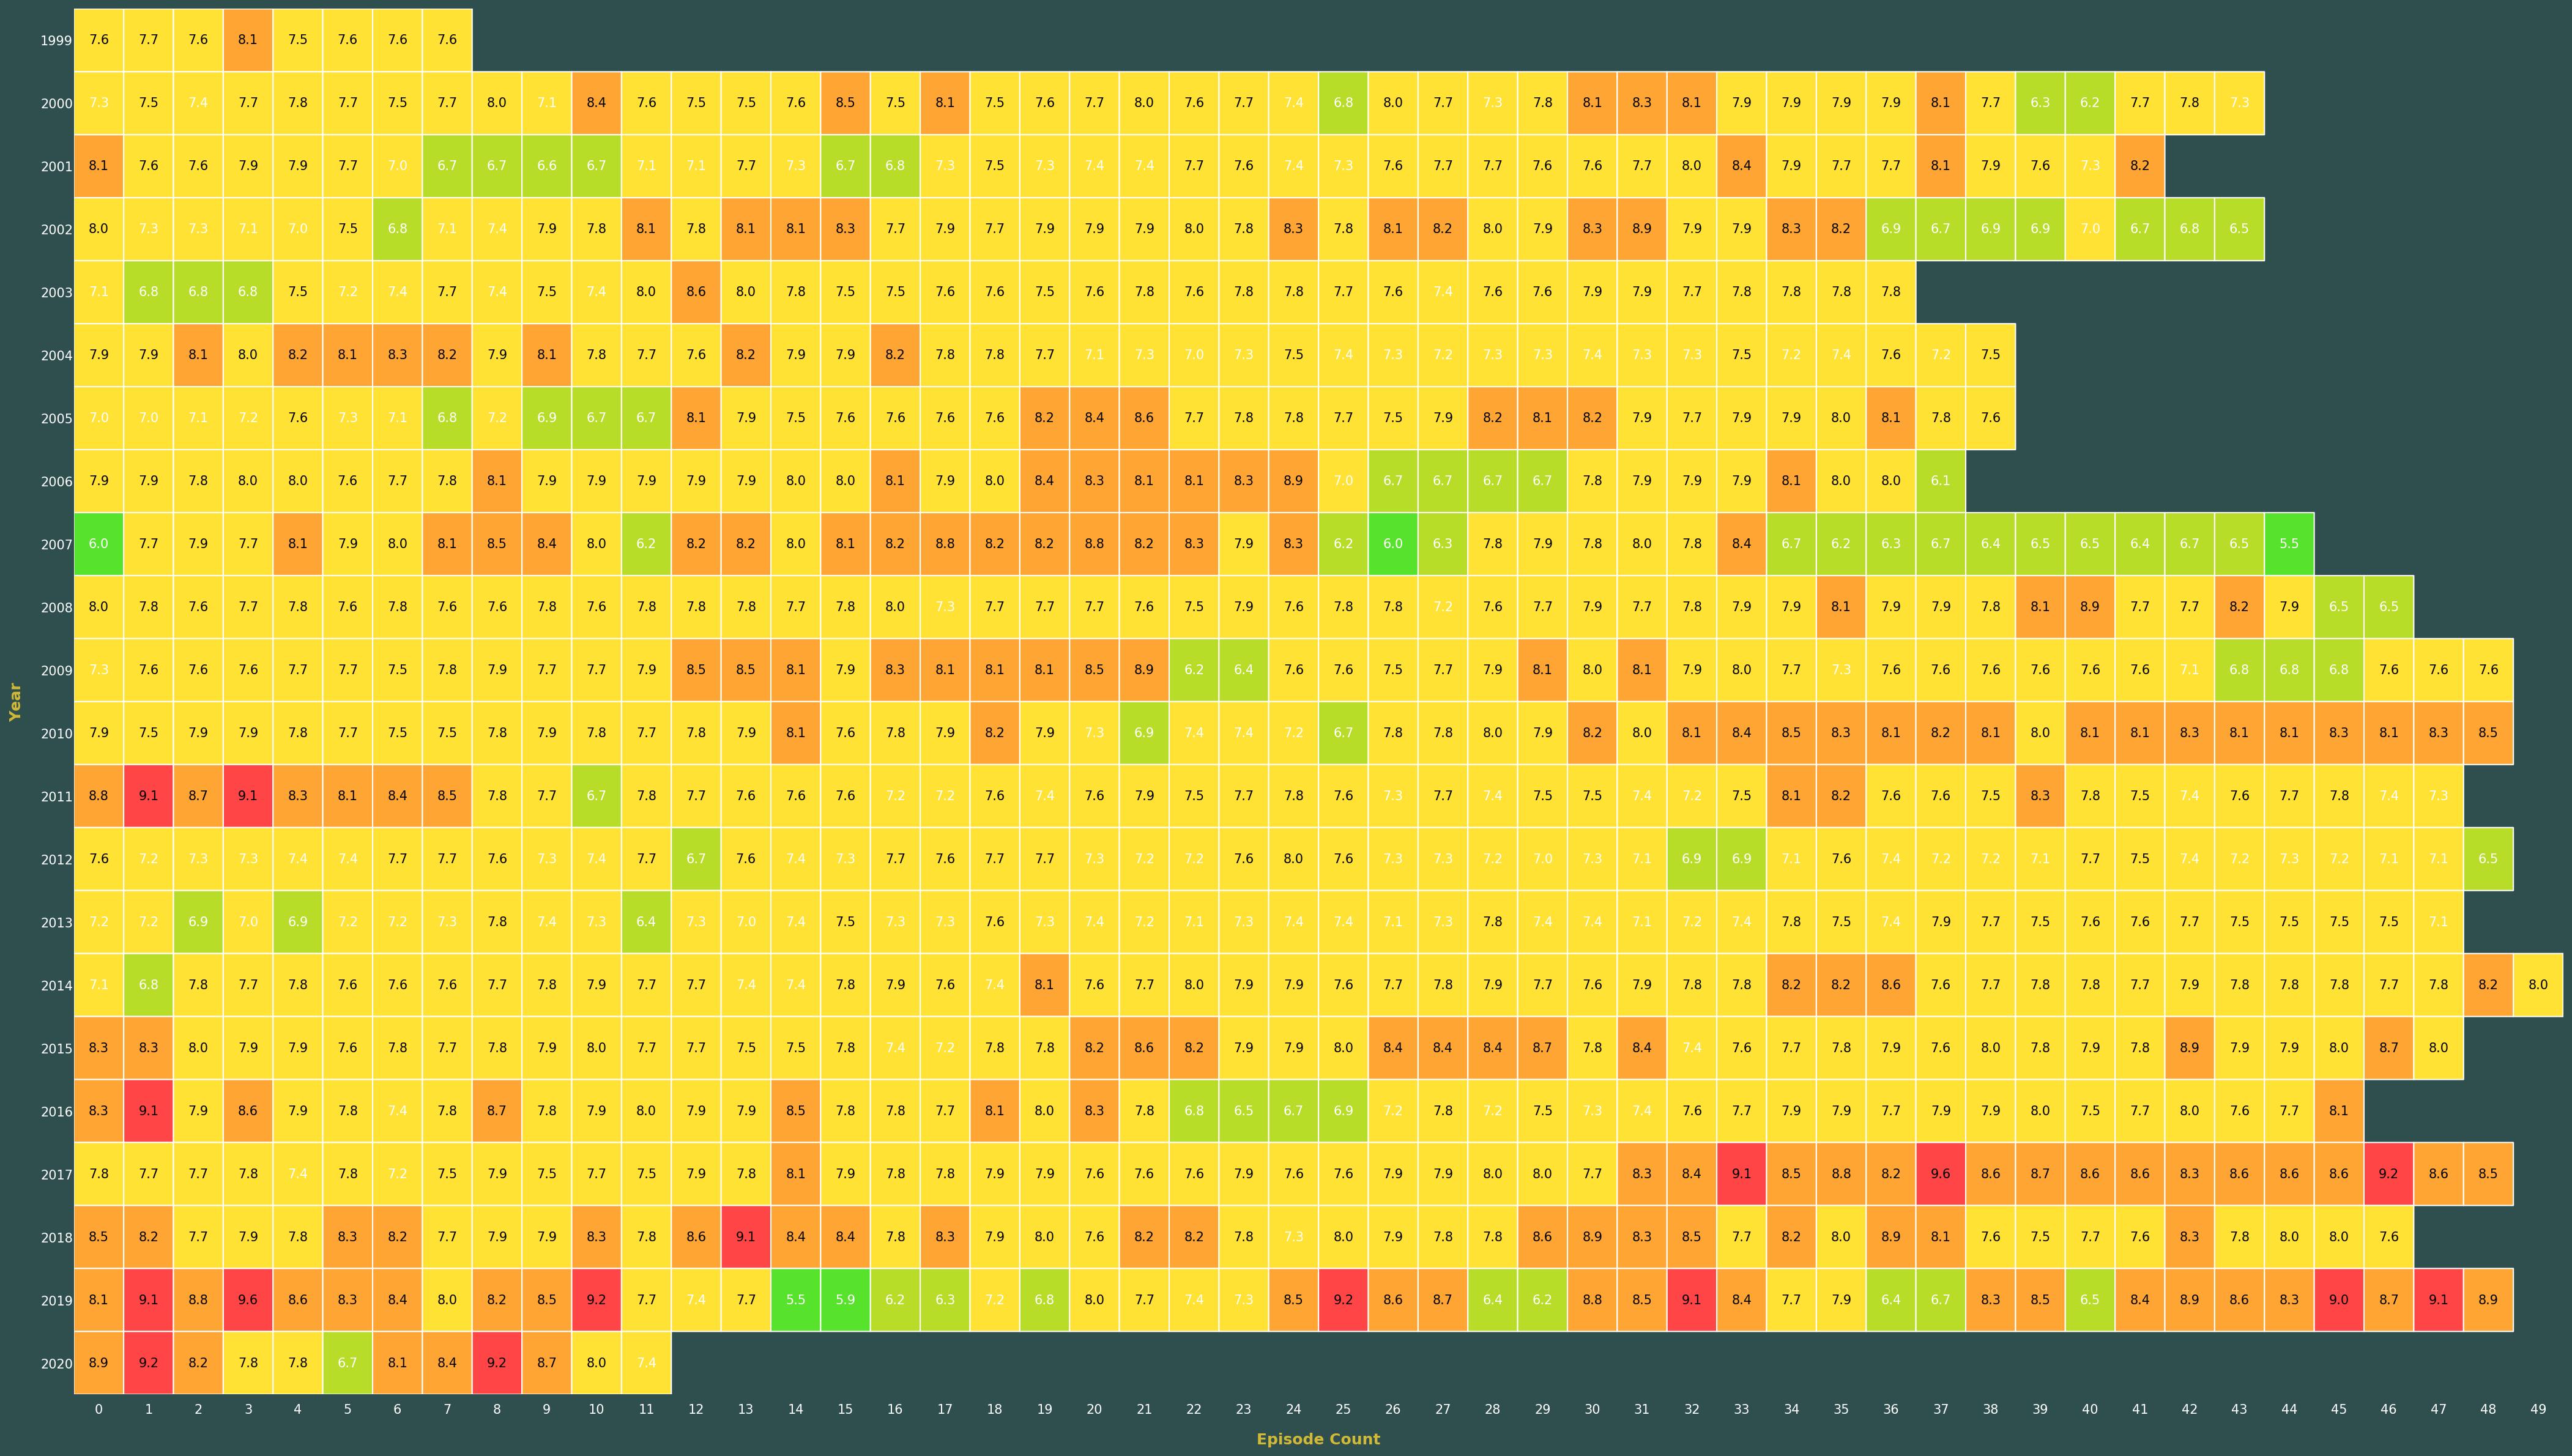

In [6]:
background = 'darkslategray'
grid_color = 'white'
label_color = '#D1B935'
tick_color = 'white'
value_colors = ['white', 'black']

fig, ax = plt.subplots(dpi=150, figsize=(35, 20), facecolor=background)
ratings.plot_ratings_ax(ax, df_ratings.T, cm, background, xlabel='Episode Count', ylabel='Year', x_axis_top=False, text_color_threshold=7.5, grid_color=grid_color, value_colors=value_colors, xlabel_color=label_color, ylabel_color=label_color, tick_color=tick_color)

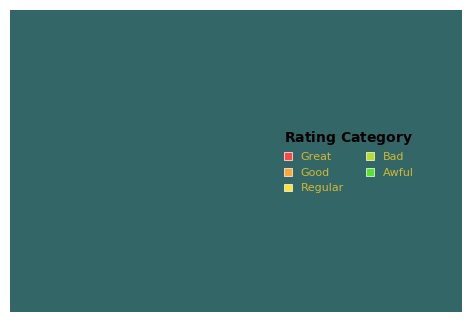

In [7]:
#Creating a legend
background_img_path = 'background.png'
rating_labels = ['Great', 'Good', 'Regular', 'Bad', 'Awful']
rating_colors = colors[::-1]
bbox_to_anchor = [0.75, 0.5]
title_color = '#C52B1F'
label_color = '#D1B935'

fig, ax = plt.subplots(dpi=100)
ratings.plot_info_panel(ax, background_img_path, rating_colors, rating_labels, bbox_to_anchor=bbox_to_anchor, label_fontsize=8, title_fontsize=10, label_color=label_color)